In [1]:
import os, re, sys, glob
import pandas as pd
import numpy as np
from scipy import io as sio
from matplotlib import pyplot as plt
import inspect

In [2]:
# Define a function to see the source code of a function. 
def showfunc(functiontoshow):
    print(inspect.getsource(functiontoshow))

In [3]:
import typhon as tp

In [4]:
# Assume WGS 1984 for the reference Ellipsoid.
R_eq = 6378137 # Earth's equatorial radius, in meters
iFlttn = 298.257223563 # Inverse flattening
R_polar = R_eq * (1-1/iFlttn) # Earth's polar radius
eccnty = (2/iFlttn - (1/iFlttn)**2)**0.5 # Eccentricity of the ellipsoid 

In [5]:
# Files location
dain = "/Users/BLee/Desktop/ARTS/ARTS-Workspace/WorkWith2018Data/07-07/"

# Observation/simulation time
TimeOfInterest = pd.Timestamp('2018-07-07 15:00:00+0000',tz='UTC')

In [6]:
# Read in LDAPS data. 

# Pressure (pres) data
fn_pres = "ldps_v070_erlo_pres_BSWO_h000." + TimeOfInterest.strftime('%Y%m%d%H') + ".txt"
f_pres = os.path.join(dain,fn_pres)
df_pres = pd.read_csv(f_pres, skiprows=0, 
                 names=['Index', '?(GridPosition)', 'Type', 'Pressure', 'Longitude', 'Latitude', 'Value'], 
                 sep=':|:| mb:lon=|,lat=|,val=', 
                 engine='python')

# Surface (unis) data
#fn_unis = "ldps_v070_erlo_unis_h000.2018070715.txt"
#f_unis = os.path.join(dain,fn_unis)
#df_unis = pd.read_csv(f_unis, skiprows=0, 
#                 names=['Index', '?1', 'Type', 'Pressure', 'Longitude', 'Latitude', 'Value'], 
#                 sep=':|:| mb:lon=|,lat=|,val=', 
#                 engine='python')

pres_P = df_pres.loc[df_pres.Type=='HGT'].Pressure.values * 100
pres_GH = df_pres.loc[df_pres.Type=='HGT'].Value.values
pres_T = df_pres.loc[df_pres.Type=='TMP'].Value.values
pres_RH = df_pres.loc[df_pres.Type=='RH'].Value.values

In [7]:
# Read in radimeters data. 

In [8]:
# Functions for reading in radiometers data. Written by Dr. Choi. 
class radiometrics:
    def read_lv0_data(self,f, *args):

        if not f:
            print("Missing argument FN, Please provide input filename.")
        if len(args) == 0:
            tmp_dir = os.path.dirname(f)
            dat_idx = '15'
        else:
            if len(args) == 1:
                dat_idx = args[0]
                tmp_dir = os.path.dirname(f)
            else:
                dat_idx = args[0]
                tmp_dir = args[1]

        dain = os.path.dirname(f)
        fn = os.path.basename(f)

        fn_sep = re.split('[. _]', fn)
        if fn_sep[2] != 'lv0':
            print("=============================================================================")
            print(" Given file is not Level2 data. Please try again with lv0 file. Returning...")
            print("=============================================================================")
            return -1

        f1 = "_".join(fn_sep[:len(fn_sep)-1]) + "_{0}".format( dat_idx ) + ".csv"
        file_exists = os.path.isfile( os.path.join(dain, f1) )
        print(file_exists) 
        if not file_exists:
            bsmwr = radiometrics()
            bsmwr.prepare_original(f)

        fin = os.path.join(dain, f1)

        delimiters = ("+", "-", "%", "/", '|', ":", " ", "(", ")")
        # Get headers (column titles)
        regexPattern = '|'.join(map(re.escape, delimiters))
        with open( fin, 'r' ) as d:
                line = d.readline()     # Read the first line in file
                h0 = re.split(',|\n', line)
        d.close()
        # Read data
        df = pd.read_csv(fin, skiprows=1,names=h0)

        # Make time understood in Pandas
        df["DateTime"] = pd.to_datetime(df["DateTime"], format='%d/%m/%Y %H:%M:%S', utc=True)

        self.df = df
        return df

    def read_lv1_data(self,f, *args):

        if not f:
            print("Missing argument FN, Please provide input filename.")
        if len(args) == 0:
            tmp_dir = os.path.dirname(f)
            dat_idx = '50'
        else:
            if len(args) == 1:
                dat_idx = args[0]
                tmp_dir = os.path.dirname(f)
            else:
                dat_idx = args[0]
                tmp_dir = args[1]

        dain = os.path.dirname(f)
        fn = os.path.basename(f)

        fn_sep = re.split('[. _]', fn)
        if fn_sep[2] != 'lv1':
            print("=============================================================================")
            print(" Given file is not Level2 data. Please try again with lv1 file. Returning...")
            print("=============================================================================")
            return -1

        f1 = "_".join(fn_sep[:len(fn_sep)-1]) + "_{0}".format( dat_idx ) + ".csv"
        file_exists = os.path.isfile( os.path.join(dain, f1) )
        print(file_exists) 
        if not file_exists:
            bsmwr = radiometrics()
            bsmwr.prepare_original(f)

        fin = os.path.join(dain, f1)

        delimiters = ("+", "-", "%", "/", '|', ":", " ", "(", ")")
        # Get headers (column titles)
        regexPattern = '|'.join(map(re.escape, delimiters))
        with open( fin, 'r' ) as d:
                line = d.readline()     # Read the first line in file
                h0 = re.split(',|\n', line)
        d.close()
        # Read data
        df = pd.read_csv(fin, skiprows=1,names=h0)

        # Make time understood in Pandas
        df["DateTime"] = pd.to_datetime(df["DateTime"], format='%d/%m/%y %H:%M:%S', utc=True)

        self.df = df
        return df

    def read_lv2_data(self,f,*args):

        if not f:
            print("Missing argument FN, Please provide input filename.")
        if len(args) == 0:
            tmp_dir = os.path.dirname(f)
            dat_idx = '400'
        else:
            if len(args) == 1:
                dat_idx = args[0]
                tmp_dir = os.path.dirname(f)
            else:
                dat_idx = args[0]
                tmp_dir = args[1]

        dain = os.path.dirname(f)
        fn = os.path.basename(f)

        fn_sep = re.split('[. _]', fn)
        if fn_sep[2] != 'lv2':
            print("=============================================================================")
            print(" Given file is not Level2 data. Please try again with lv2 file. Returning...")
            print("=============================================================================")
            return -1

        f1 = "_".join(fn_sep[:len(fn_sep)-1]) + "_{0}".format( dat_idx ) + ".csv"
        file_exists = os.path.isfile( os.path.join(dain, f1) )
        print(file_exists) 
        if not file_exists:
            bsmwr = radiometrics()
            bsmwr.prepare_original(f)

        fin = os.path.join(dain, f1)

        delimiters = ("+", "-", "%", "/", '|', ":", " ", "(", ")")
        # Get headers (column titles)
        regexPattern = '|'.join(map(re.escape, delimiters))
        with open( fin, 'r' ) as d:
                line = d.readline()     # Read the first line in file
                h0 = re.split(',|\n', line)
        d.close()
        # Read data
        df = pd.read_csv(fin, skiprows=1,names=h0)

        # Make time understood in Pandas
        df["DateTime"] = pd.to_datetime(df["DateTime"], format='%d/%m/%y %H:%M:%S', utc=True)

        self.df = df
        return df
    
    def prepare_original(self, fn, *args):

        if not fn:
            print("Missing argument FN, Please provide input filename.")
        if len(args) == 0:
            tmp_dir = os.path.dirname(fn)
        else:
            tmp_dir = args[0]
        fn_sep = fn.split(".")

        dataidx = []
        datanum = []
        delimiters = ("+", "-", "%", "/", '|', ":", " ", "(", ")")
        regexPattern = '|'.join(map(re.escape, delimiters))
        with open( fn, 'r' ) as d:
            while True:
                line = d.readline()     # Read the first line in file
                if not line: 
                    self.dataidx = [0]
                    return dataidx
                    break
                h0 = re.split(',|\n', line)
                nh = len( h0 ) - 1      # Number of headers. Ignore last header since it's '/n'
                # 
                # Remove inappropriate letters for BIN filename
                # 
                h1 = [ "".join( re.split(regexPattern, h0[i]) ) for i in range(0,nh) ]
                                        #---------------------------
                if h1[0] == "Record":   # Header for each data type
                                        #---------------------------
                    dataidx.append( h1[2] )
                    datanum.append(1)

                    foun = ".".join(fn_sep[:len(fn_sep)-1]) + "_{0}".format( h1[2] ) + '.csv'
                    fou = open( os.path.join(tmp_dir, foun), 'w' )                     # Open input file
                    fou.write( ",".join(h1) + "\n" )                                # Write data (Add \n for new line
                    fou.close()                                                     # Close input file
                                        #-------------------------
                else:                   # Data for each data type
                                        #-------------------------
                    if h1[2] == '99':
                        if dataidx.count('99') == 0:
                            dataidx.append( h1[2] )
                            datanum.append(1)
                            file_op_index = 'w'
                        else:
                            datanum[dataidx.index('99')] = datanum[dataidx.index('99')] + 1
                            file_op_index = 'a'

                            foun = ".".join(fn_sep[:len(fn_sep)-1]) + "_{0}".format( "99" ) + '.csv'
                            fou = open( os.path.join(tmp_dir, foun), file_op_index )   # Open input file
                            fou.write( line )                                       # Write data
                            fou.close()                                             # Close input file
                    else:
                        for i in range( 0, len(dataidx) ):
                            line_index = int(h1[2])
                            data_index = int(dataidx[i])
                            if (line_index > data_index and line_index <= data_index + 5):
                                #
                                # There are types of data line ends with comma(,), which Python code recognise
                                # as null('') at re.split. In this case, comma separated array shows one more
                                # elements than it should. If last element of comma separated array contains
                                # null(''), it should drop as bellow. 
                                #
                                h1len = len(h1)
                                if h1[h1len-1] == '':
                                    h1 = h1[0:h1len-1]
                                    nh = nh - 1

                                datanum[dataidx.index(dataidx[i])] = datanum[dataidx.index(dataidx[i])] + 1

                                foun = ".".join(fn_sep[:len(fn_sep)-1]) + "_{0}".format( dataidx[i] ) + '.csv'
                                fou = open( os.path.join(tmp_dir, foun), 'a' )         # Open input file
                                fou.write( line )                                   # Write data
                                fou.close()                                         # Close input file

        d.close()
        self.dataidx = dataidx
        return dataidx

In [9]:
# Read in brightness temperature data, contained in Level1 data.
fn_radmtr_lv1 = "2018-07-07_00-04-14_lv1.csv"
f_radmtr_lv1 = os.path.join(dain,fn_radmtr_lv1)
df_radmtr_lv1 = radiometrics()
df_radmtr_lv1.read_lv1_data(f_radmtr_lv1)

# Radiometer channels
radmtr_channels = df_radmtr_lv1.df.loc[:,'Ch22.000':'Ch58.800'].dropna(axis=1).columns.str.replace('Ch','')
radmtr_channels = radmtr_channels.values.astype(np.float64) * 1e9

True


In [10]:
# Radiometer observations (brightness temperatures) for the specific time 
BosungObs_radmtr = df_radmtr_lv1.df.loc[(df_radmtr_lv1.df.DateTime - TimeOfInterest).abs().idxmin()]
print(BosungObs_radmtr.DateTime)
BosungObs_radmtr = BosungObs_radmtr.loc['Ch22.000':'Ch58.800'].dropna().values.flatten()

2018-07-07 14:59:00+00:00


In [11]:
# Save as .xml files. 
tp.arts.xml.save(radmtr_channels, './ClearSky_1D_f_grid.xml')
tp.arts.xml.save(BosungObs_radmtr, './BosungObservations.xml')

In [12]:
# Read in radiosondes data. 
fn_radsnd = "UPP_LV2_RS92-SGP_47258_" + TimeOfInterest.strftime('%Y%m%d%H%M') + ".txt"
f_radsnd = os.path.join(dain,fn_radsnd)
df_radsnd = pd.read_csv(f_radsnd, sep=",")
#print(*df_radsnd.time.values, sep='\n') # Print all values.
#print(df_radsnd.columns) % Data types. 
#print(df_radsnd.loc[1865:1868]) # Pressure duplicates

# Solicit useful variables. 
df_radsnd_useful = df_radsnd[['HGT', 'time', 'P', 'Temp', 'RH', 'MixR', 'Lon', 'Lat', 'Alt']]
df_radsnd_useful = df_radsnd_useful.dropna().reset_index().drop('index',axis=1)
df_radsnd_useful.loc[1:,] = df_radsnd_useful.loc[1:,].astype(float).values 
df_radsnd_useful_size = len(df_radsnd_useful.loc[:,'P'])

In [21]:
# Interpolate the data to fewer vertical grids. Use the nearest neighbor interpolation.
df_radsnd_useful_interp_size = 50;
df_radsnd_useful_interp = pd.DataFrame( 
    {'P' : 
     np.linspace(df_radsnd_useful.loc[1,'P'], df_radsnd_useful.loc[df_radsnd_useful_size-1,'P'], df_radsnd_useful_interp_size)} )
df_radsnd_useful_interp = df_radsnd_useful_interp.reindex(df_radsnd_useful.columns, axis=1)

# Interpolation
for i in range(df_radsnd_useful_interp_size):
    nearneigindex = (df_radsnd_useful.loc[1:,'P'] - df_radsnd_useful_interp.loc[i,'P']).astype(float).abs().idxmin()
    df_radsnd_useful_interp.loc[i,] = df_radsnd_useful.loc[nearneigindex,].astype('float')

# Unit changes
df_radsnd_useful_interp.loc[:,'P'] = df_radsnd_useful_interp.loc[:,'P'] * 100
df_radsnd_useful_interp.loc[:,'Temp'] = df_radsnd_useful_interp.loc[:,'Temp'] + 273.15
df_radsnd_useful_interp.loc[:,'MixR'] = df_radsnd_useful_interp.loc[:,'MixR'] * 1e-3

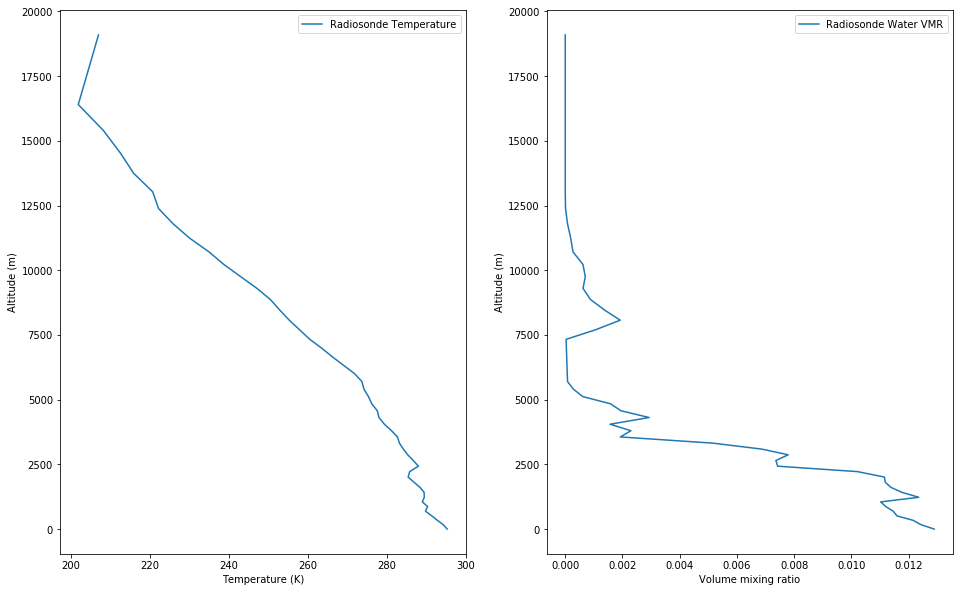

In [14]:
# Visualize the radiosondes data. 
plt.figure()

plt.subplot(1,2,1)
plt.plot(df_radsnd_useful_interp.loc[:,'Temp'], df_radsnd_useful_interp.loc[:,'HGT'])
plt.xlabel('Temperature (K)')
plt.ylabel('Altitude (m)')
#plt.ylabel('Pressure (Pa)')
#plt.gca().invert_yaxis()
plt.legend(['Radiosonde Temperature'])

plt.subplot(1,2,2)
plt.plot(df_radsnd_useful_interp.loc[:,'MixR'], df_radsnd_useful_interp.loc[:,'HGT'])
plt.xlabel('Volume mixing ratio')
plt.ylabel('Altitude (m)')
#plt.ylabel('Pressure (Pa)')
#plt.gca().invert_yaxis()
plt.legend(['Radiosonde Water VMR'])

plt.gcf().set_size_inches(16,10)

# Save the figure.
plt.savefig(TimeOfInterest.strftime('%Y_%m_%d_%H-%M-%S_') + 'T&WaterVMR' + '.png')

In [15]:
# Necessary variables for ARTS simulations 
radsnd_P = df_radsnd_useful_interp.loc[:,'P'].values
radsnd_T = df_radsnd_useful_interp.loc[:,'Temp'].values
radsnd_WaterVMR = df_radsnd_useful_interp.loc[:,'MixR'].values
radsnd_HGT = df_radsnd_useful_interp.loc[:,'HGT'].values

# Save as .xml files.
tp.arts.xml.save(radsnd_P, './ClearSky_1D_p_grid.xml')

# Save z_field as GriddedField3 xml file. 
z_field_GF3 = tp.arts.griddedfield.GriddedField3()
z_field_GF3.data = np.reshape(radsnd_HGT,(len(radsnd_P),1,1))
z_field_GF3.grids = [radsnd_P, np.array([0]), np.array([0])]
z_field_GF3.gridnames = ['Pressure', 'Latitude', 'Longitude']
tp.arts.xml.save(z_field_GF3, './ClearSky_1D.z.xml')

# Save t_field as GriddedField3 xml file. 
t_field_GF3 = tp.arts.griddedfield.GriddedField3()
t_field_GF3.data = np.reshape(radsnd_T,(len(radsnd_P),1,1))
t_field_GF3.grids = [radsnd_P, np.array([0]), np.array([0])]
t_field_GF3.gridnames = ['Pressure', 'Latitude', 'Longitude']
tp.arts.xml.save(t_field_GF3, './ClearSky_1D.t.xml')

# Save Water VMR as GriddedField3 xml file. 
VMR_H2O_GF3 = tp.arts.griddedfield.GriddedField3()
VMR_H2O_GF3.data = np.reshape(radsnd_WaterVMR,(len(radsnd_P),1,1))
VMR_H2O_GF3.grids = [radsnd_P, np.array([0]), np.array([0])]
VMR_H2O_GF3.gridnames = ['Pressure', 'Latitude', 'Longitude']
tp.arts.xml.save(VMR_H2O_GF3, './ClearSky_1D.H2O.xml')

In [16]:
# Sensor LOS and geolocation 
tp.arts.xml.save(np.array([[0]]), './ClearSky_1D_sensor_los.xml')
tp.arts.xml.save(np.array([[0]]), './ClearSky_1D_sensor_pos.xml')

In [17]:
# ARTS forward model: 
tp.arts.run_arts(controlfile='./ClearSky_1D_ARTSvdev.arts');

# ARTS forward model results. 
Tb_ARTS_ClearSky = tp.arts.xml.load("./ClearSky_1D_Tb.xml")

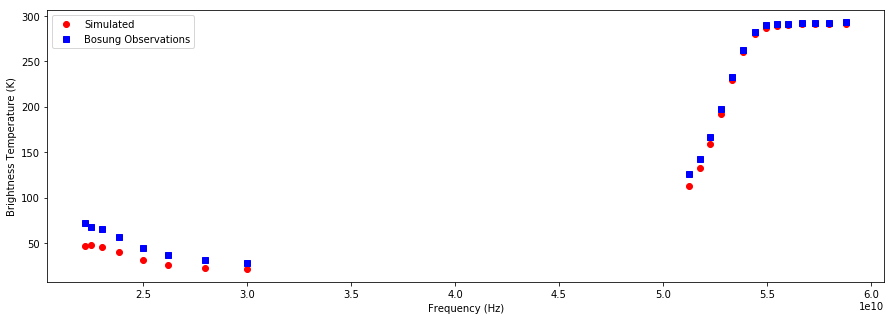

In [18]:
# Compare brightness temperatures from the simulation with the observations. 
plt.plot(radmtr_channels, Tb_ARTS_ClearSky, 'ro', radmtr_channels, BosungObs_radmtr, 'bs')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Brightness Temperature (K)')
plt.legend(['Simulated','Bosung Observations'])
plt.gcf().set_size_inches(15,5)

# Save the figure.
plt.savefig(TimeOfInterest.strftime('%Y_%m_%d_%H-%M-%S_') + 'ForwardModelvObservations' + '.png')

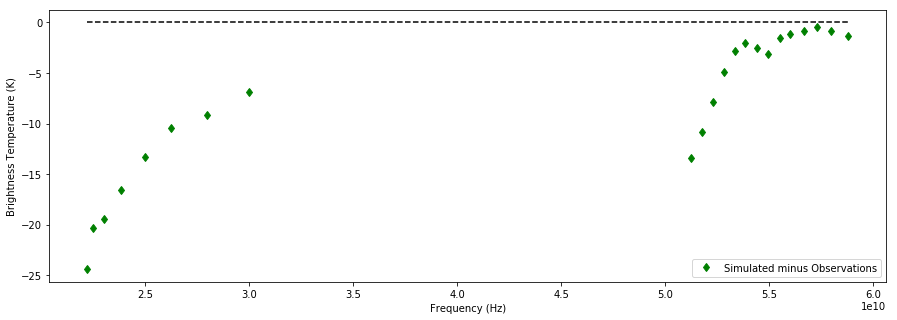

In [19]:
# Plot the difference between the two. 
plt.plot(radmtr_channels, Tb_ARTS_ClearSky - BosungObs_radmtr, 'gd', 
         radmtr_channels, np.zeros(radmtr_channels.shape),'k--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Brightness Temperature (K)')
plt.legend(['Simulated minus Observations'])
plt.gcf().set_size_inches(15,5)

# Save the figure.
plt.savefig(TimeOfInterest.strftime('%Y_%m_%d_%H-%M-%S_') + 'ForwardModelvObservationsDiff' + '.png')